In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report

In [26]:
df=pd.read_csv("/kaggle/input/car-data/car_data.csv")
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [27]:
df=df.drop('User ID',axis=1)

In [28]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [29]:
df.head()

,Gender,Age,AnnualSalary,Purchased
0,1,35,20000,0
1,1,40,43500,0
2,1,49,74000,0
3,1,40,107500,1
4,1,25,79000,0


In [30]:
X=df.drop("Purchased",axis=1)
y=df["Purchased"]

In [31]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(max_depth=5,random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [33]:
y_pred=model.predict(x_test)

In [34]:
print("Accuracy",accuracy_score(y_test,y_pred))
print("Classification report",classification_report(y_test,y_pred))

Accuracy 0.915
Classification report               precision    recall  f1-score   support

           0       0.91      0.94      0.93       112
           1       0.92      0.89      0.90        88

    accuracy                           0.92       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.92      0.92      0.91       200



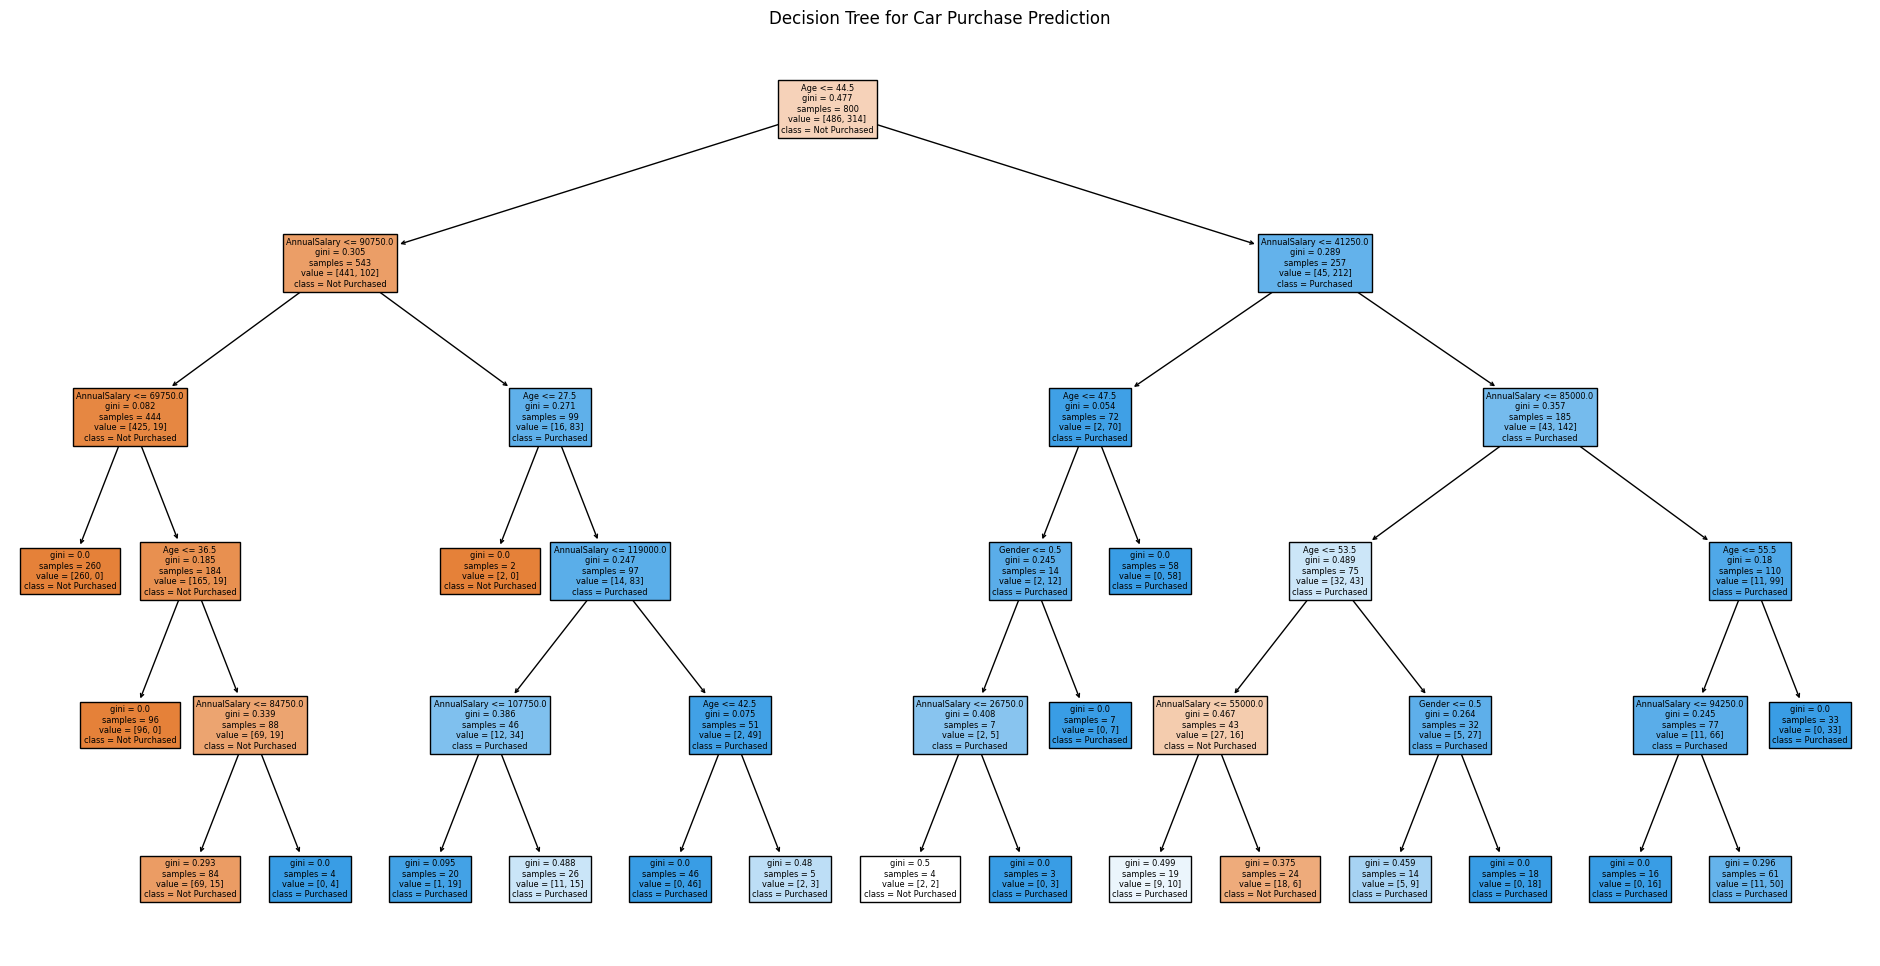

In [35]:
plt.figure(figsize=(24, 12))
tree.plot_tree(model, feature_names=X.columns, class_names=["Not Purchased", "Purchased"], filled=True)
plt.title("Decision Tree for Car Purchase Prediction")
plt.show()
